# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

**AI-assisted notebook — please review code and outputs carefully.**

This notebook introduces Dandiset 001375, which contains electrophysiological data from a pilot study on the effect of septal GABAergic disruption via DREADDs on hippocampal and neocortical activity in mouse. The notebook demonstrates how to load, inspect, and visualize selected NWB files using the DANDI API and the `pynwb`, `remfile`, and `h5py` libraries.

- **Dandiset DOI and landing page:** [https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

## What this notebook covers:
- Overview of the dataset content and structure
- Accessing Dandiset assets using the DANDI API
- Streaming and examining NWB data from a selected session (without full download)
- Basic exploration and visualization of trials, electrodes, and spiking units

## Required Packages
- `dandi`
- `remfile`
- `h5py`
- `pynwb`
- `matplotlib`
- `pandas`
- `numpy`

Please ensure these packages are installed in your environment before running the notebook.

## 1. Accessing Dandiset 001375 using the DANDI API

We'll use the DANDI API to programmatically browse the available assets and find NWB files of interest. This approach allows you to stream data from the archive with minimal local disk usage.

In [1]:
# Import required libraries
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI Archive and get the Dandiset
dandiset_id = "001375"
dandiset_version = "0.250406.1855"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List all assets (NWB files) in the Dandiset
print("Available assets in Dandiset 001375:")
for asset in dandiset.get_assets():
    print("-", asset.path)

Available assets in Dandiset 001375:


- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


## 2. Loading and Streaming an NWB File

We'll work with the file `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb` as an example. Data are read remotely using `remfile` and `h5py`, streamed directly from DANDI S3.

In [2]:
import remfile
import h5py
import pynwb

# Define the NWB file path of interest
nwb_asset_path = "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb"

# Get the direct download URL for streaming
nwb_url = next(dandiset.get_assets_by_glob(nwb_asset_path)).download_url

# Open the remote file via HTTP(S) streaming
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)

# Load the NWB data using pynwb
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## 3. Session and Subject Metadata

Let's inspect the basic metadata: session description, subject details, and device/probe information.

In [3]:
print("Session Description:", nwb.session_description)
print("Session Start Time:", nwb.session_start_time)
print("Subject ID:", nwb.subject.subject_id)
print("Subject Age:", nwb.subject.age)
print("Subject Sex:", nwb.subject.sex)
print("Subject Species:", nwb.subject.species)
print("Subject Experimental Description:", nwb.subject.description)
print("Device(s):")
for device_name, device in nwb.devices.items():
    print(f" - {device_name}: {device.description} ({device.manufacturer})")

Session Description: mouse running laps in virtual hallway
Session Start Time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject Age: P90D
Subject Sex: M
Subject Species: Mus musculus
Subject Experimental Description: medial septum DREADD to suppress GABA interneurons
Device(s):
 - silicon probe array: 128 ch silicon probe (UCLA)


## 4. Trials/Laps Overview

This session records mouse laps in a virtual hallway, annotated as trials. We'll extract and visualize their timing.

Number of trials (laps): 387
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467


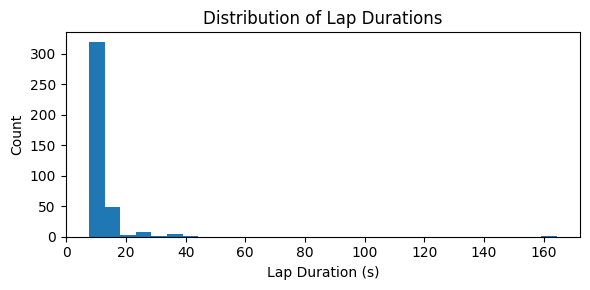

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Get trials as a pandas DataFrame
trials_df = nwb.trials.to_dataframe()
print("Number of trials (laps):", len(trials_df))
print(trials_df.head())

# Plot histogram of trial durations
durations = trials_df["stop_time"] - trials_df["start_time"]
plt.figure(figsize=(6,3))
plt.hist(durations, bins=30)
plt.xlabel("Lap Duration (s)")
plt.ylabel("Count")
plt.title("Distribution of Lap Durations")
plt.tight_layout()
plt.show()

## 5. Electrode Layout and Coverage

The dataset used a 128-channel silicon probe from UCLA, arranged into two shanks. We'll look at the organization and spatial layout.

       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13440...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13440...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13440...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13440...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13440...     shank1   

                  label  
id                       
0   shank1-electrode001  
1   shank1-electrode002  
2   shank1-electrode003  
3   shank1-electrode004  
4   shank1-electrode005  


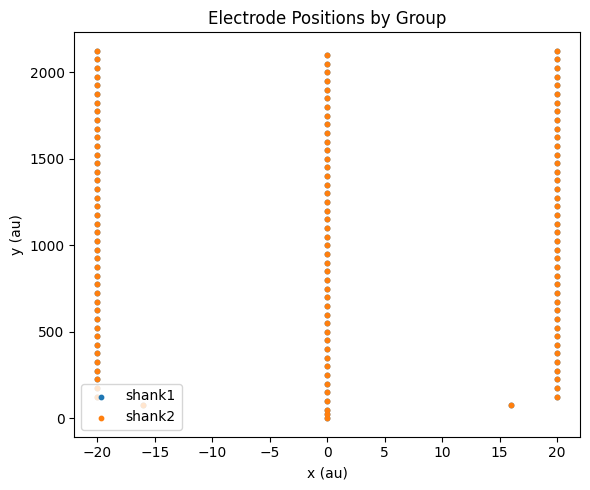

In [5]:
import numpy as np

# Convert electrodes DynamicTable to DataFrame
elec_df = nwb.electrodes.to_dataframe()
print(elec_df.head())

# Plot electrode (x,y) locations, colored by shank/group name
plt.figure(figsize=(6,5))
groups = elec_df["group_name"].unique()
for group in groups:
    group_df = elec_df[elec_df["group_name"] == group]
    plt.scatter(group_df["x"], group_df["y"], label=group, s=10)
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.title("Electrode Positions by Group")
plt.legend()
plt.tight_layout()
plt.show()

## 6. Spiking Units: Summary and Example Raster

Spike sorting was performed, resulting in 33 units. We'll explore their spike count distribution, then plot raster data for the first few sorted units.

Number of sorted units: 33
                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...


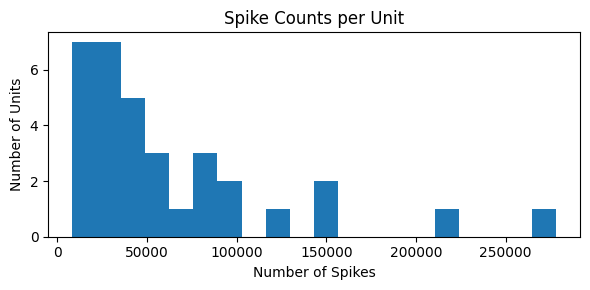

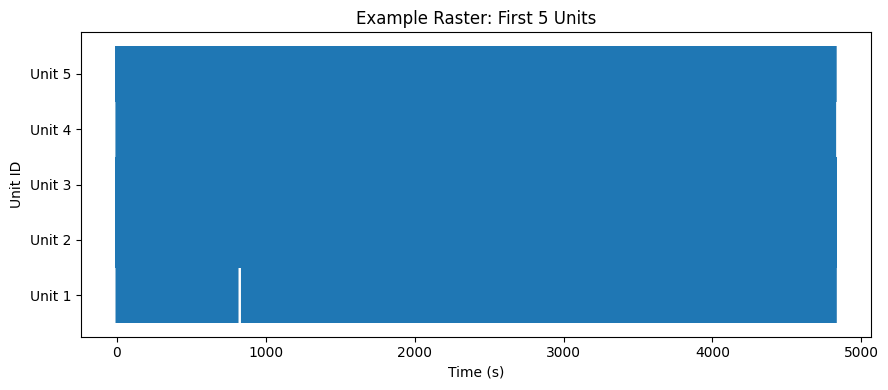

In [6]:
# Convert units table to DataFrame
units_df = nwb.units.to_dataframe()
print("Number of sorted units:", len(units_df))
print(units_df.head())

# Plot histogram of spike counts per unit
spike_counts = units_df["spike_times"].apply(len)
plt.figure(figsize=(6,3))
plt.hist(spike_counts, bins=20)
plt.xlabel("Number of Spikes")
plt.ylabel("Number of Units")
plt.title("Spike Counts per Unit")
plt.tight_layout()
plt.show()

# Raster plot for first 5 units
plt.figure(figsize=(9,4))
for i in range(5):
    spike_times = units_df["spike_times"].iloc[i]
    plt.vlines(spike_times, i+0.5, i+1.5)
plt.yticks(np.arange(1,6), [f"Unit {x}" for x in units_df.index[:5]])
plt.xlabel("Time (s)")
plt.ylabel("Unit ID")
plt.title("Example Raster: First 5 Units")
plt.tight_layout()
plt.show()

## 7. Raw Voltage Data: Data Shape and Channels

The main raw data is 256-channel 30kHz extracellular voltage data. We'll check the shape and display a snippet from the first channel.

Raw data shape: (144675584, 256)
Sampling rate (Hz): 30000.0
Unit: mV


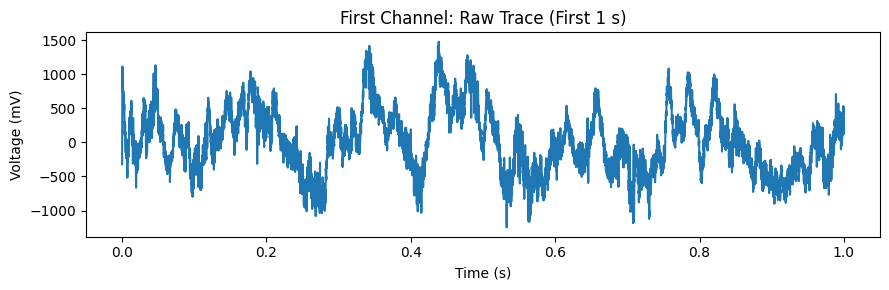

In [7]:
# Access the main TimeSeries object
ts = nwb.acquisition["time_series"]

print("Raw data shape:", ts.data.shape)  # (timepoints, channels)
print("Sampling rate (Hz):", ts.rate)
print("Unit:", ts.unit)

# Plot 1 second of data from the first channel
n_samples = int(ts.rate)  # 1 second
sample_data = ts.data[:n_samples, 0]  # First channel

plt.figure(figsize=(9,3))
plt.plot(np.arange(n_samples)/ts.rate, sample_data)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("First Channel: Raw Trace (First 1 s)")
plt.tight_layout()
plt.show()

## 8. Summary and Next Steps

This notebook provided a first-pass exploration of Dandiset 001375, including:
- Listing and accessing NWB assets via the DANDI API
- Streaming a session's NWB file directly
- Examining trials, electrodes, and units (spikes)
- Visualizing key aspects (lap durations, probe layout, spike counts, and a raw trace)

**You are encouraged to further explore the dataset's experimental conditions, per-lap activity, and deeper spike-train analysis.**

For more details, visit the [Dandiset landing page](https://dandiarchive.org/dandiset/001375/0.250406.1855) or examine the NWB metadata and other sessions explored similarly.